In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_frame=pd.read_csv('car data.csv')

In [3]:
data_frame.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
data_frame.shape

(301, 9)

In [5]:
categorical_features=[]
for cols in data_frame.columns:
    if data_frame[cols].dtype=='O':
        if cols !='Car_Name':
            print(cols)
            print(data_frame[cols].unique())

Fuel_Type
['Petrol' 'Diesel' 'CNG']
Seller_Type
['Dealer' 'Individual']
Transmission
['Manual' 'Automatic']


In [6]:
print(data_frame['Owner'].unique())

[0 1 3]


In [7]:
data_frame.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
data_frame.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [9]:
data_frame.drop(['Car_Name'],axis=1,inplace=True)
#there are many values of car.

In [10]:
data_frame['Year']=2021-data_frame['Year']

In [11]:
data_frame.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,7,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,8,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,4,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,10,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,7,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [12]:
data_frame=pd.get_dummies(data_frame,drop_first=True)

In [13]:
data_frame.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,7,3.35,5.59,27000,0,0,1,0,1
1,8,4.75,9.54,43000,0,1,0,0,1
2,4,7.25,9.85,6900,0,0,1,0,1
3,10,2.85,4.15,5200,0,0,1,0,1
4,7,4.60,6.87,42450,0,1,0,0,1


<AxesSubplot:>

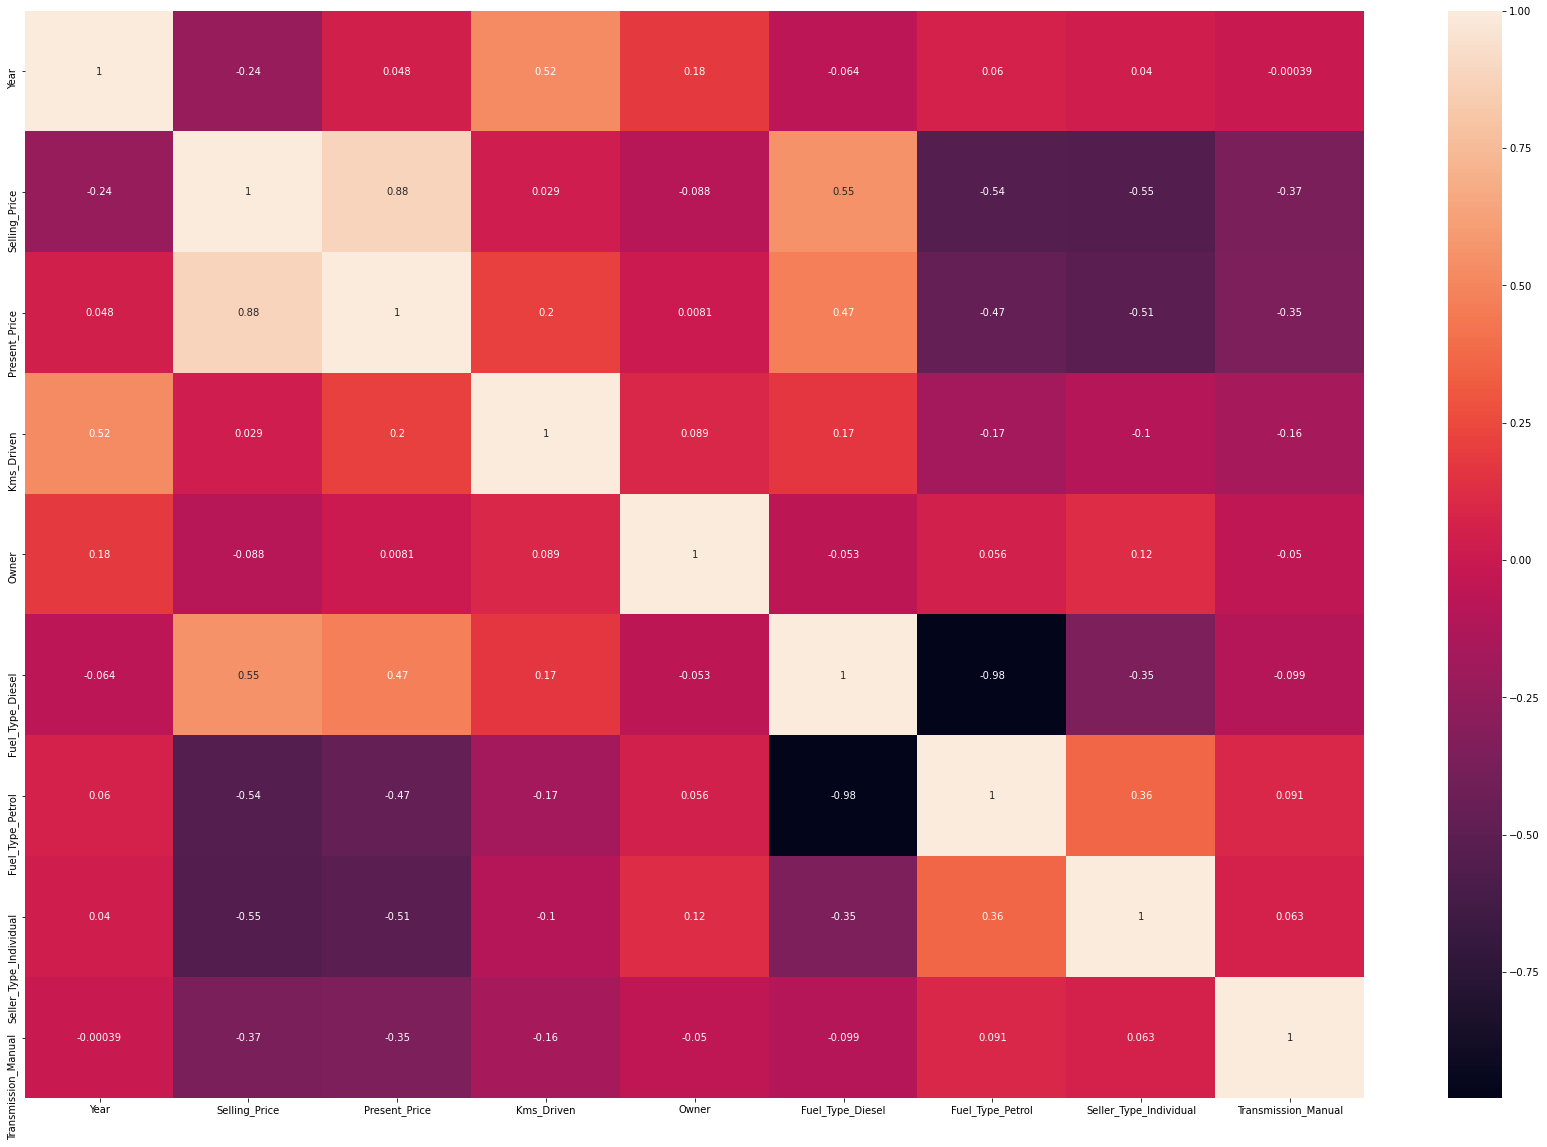

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30,20))
sns.heatmap(data_frame.corr(),annot=True)

In [15]:
x=data_frame.drop(['Selling_Price'],axis=1)
y=data_frame['Selling_Price']

In [16]:
#feature importance

In [17]:
from sklearn.ensemble import ExtraTreesRegressor

In [18]:
model=ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

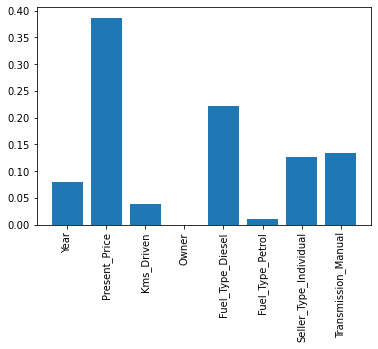

In [19]:
plt.bar(x.columns,model.feature_importances_)
plt.xticks(rotation=90);

In [42]:
x.drop(['Owner'],axis=1,inplace=True)

In [20]:
from sklearn.model_selection import train_test_split

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [22]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
model=RandomForestRegressor()

In [45]:
model.fit(x_train,y_train)

RandomForestRegressor()

In [46]:
model.score(x_test,y_test)

0.9122421454693955

In [26]:
#hyper parameters

In [27]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1000,num=12)]
max_features=['auto','sqrt']
max_depth=[int(x) for x in np.linspace(5,30,num=6)]
min_samples_split=[2,5,8,15,100]
min_samples_leaf=[1,2,4,10]

In [28]:
params={'n_estimators':n_estimators,
       'max_features':max_features,
       'max_depth':max_depth,
       'min_samples_split':min_samples_split,
       'min_samples_leaf':min_samples_leaf}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
randomcv=RandomizedSearchCV(estimator=model,param_distributions=params)

In [47]:
randomcv.fit(x_train,y_train)

RandomizedSearchCV(estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 10],
                                        'min_samples_split': [2, 5, 8, 15, 100],
                                        'n_estimators': [100, 181, 263, 345,
                                                         427, 509, 590, 672,
                                                         754, 836, 918, 1000]})

In [48]:
randomcv.best_params_

{'n_estimators': 345,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 20}

In [49]:
randomcv.score(x_test,y_test)

0.8684599771826989

In [50]:
predictions=randomcv.predict(x_test)

In [51]:
predictions

array([ 7.15565217,  0.54092754,  5.14550725,  9.19191304, 16.00608696,
        5.08962319,  3.4415942 ,  0.72481159,  4.4673913 ,  4.65362319,
        3.13521739,  0.85536232,  4.99318841,  7.94857971,  7.77634783,
       10.61228986,  7.48756522,  4.15014493,  0.44852174,  1.50391304,
        3.83266667,  5.00136232,  5.37710145,  9.67950725,  0.23426087,
        0.7595942 ,  0.43153623,  0.66168116,  0.48237681,  4.9037971 ,
        5.08344928,  5.82681159,  0.50266667,  8.7777971 ,  3.52318841,
        1.14965217,  5.65086957,  7.55518841,  0.28275362,  9.0464058 ,
        9.22272464, 19.51550725,  4.8477971 ,  4.34289855,  5.38043478,
       11.79536232,  0.27333333,  0.9093913 ,  4.97115942,  8.37388406,
        7.42834783,  3.53      ,  4.73362319, 20.87901449,  1.10947826,
        1.04246377,  0.48692754,  2.74492754,  3.60173913,  1.55884058,
        3.89431884,  8.96713043,  3.26289855, 20.93257971,  4.18347826,
        5.50982609, 10.24643478,  4.81428986,  0.50634783,  3.00

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

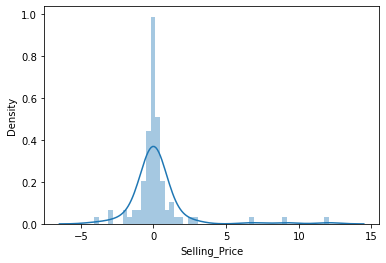

In [52]:
sns.distplot(y_test-predictions)

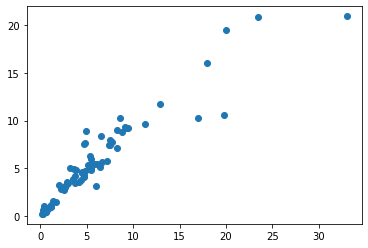

In [53]:
plt.scatter(y_test,predictions)

In [41]:
import pickle
import os
file = open('pickle_file.pkl', 'wb')
pickle.dump(odel,file)